In [2]:
import pandas as pd
import numpy as np
df  = pd.read_csv('train.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,C.A. 34651,27.7500,NaN,S
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
346,347,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0000,NaN,S
656,657,0,3,"Radeff, Mr. Alexander",male,NaN,0,0,349223,7.8958,NaN,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S


# **Univariate Analysis**


## **1. Categorical Data**

<Axes: xlabel='count', ylabel='Sex'>

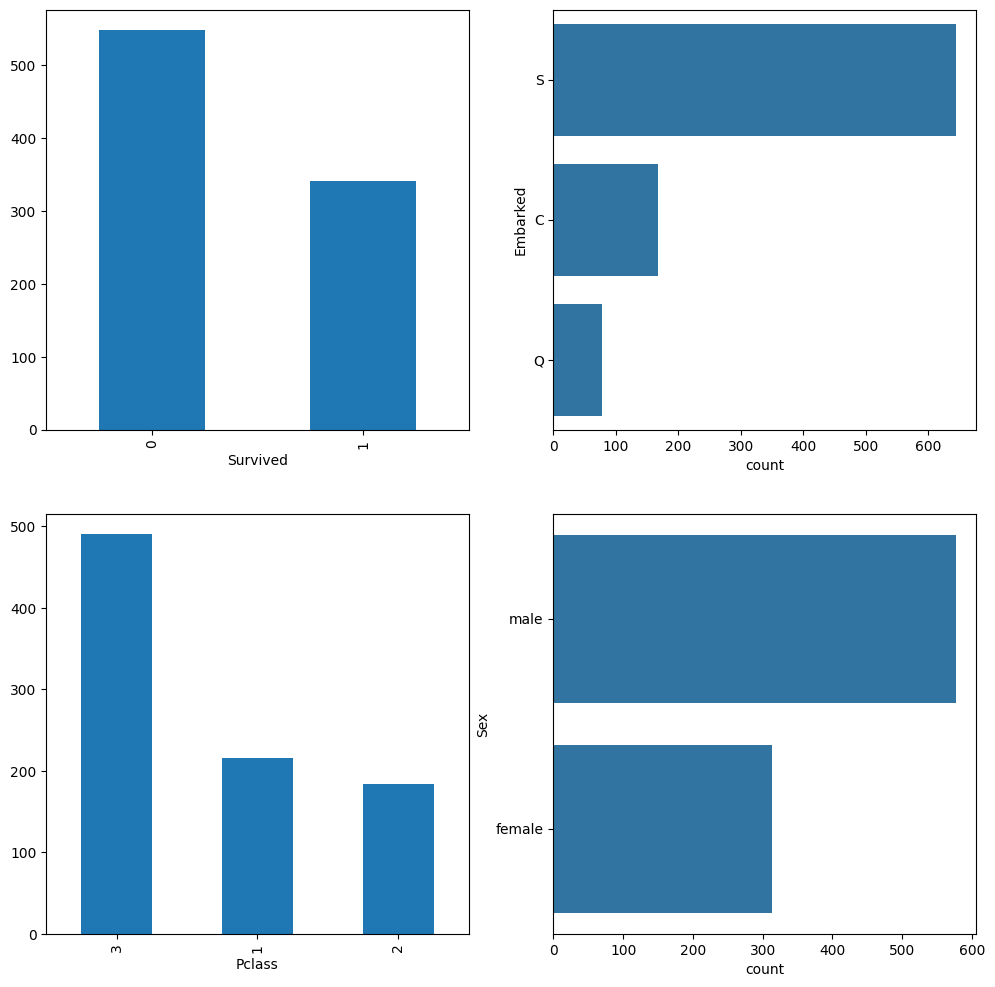

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,12),)
plt.subplot(2,2,1)
df['Survived'].value_counts().plot(kind = 'bar')
plt.subplot(2,2,2)
sns.countplot(df['Embarked'])
plt.subplot(2,2,3)
df['Pclass'].value_counts().plot(kind = 'bar')
plt.subplot(2,2,4)
sns.countplot(df['Sex'])


In [41]:
df['isAlloted'] = df['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)
df['isAlloted'].value_counts()

,count
isAlloted,
0,687
1,204


<Axes: ylabel='count'>

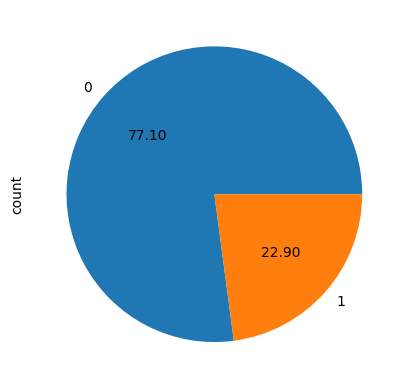

In [43]:
df['isAlloted'].value_counts().plot(kind = 'pie',autopct = '%.2f')

## **2. Numerical Data**

<Axes: xlabel='Age', ylabel='Count'>

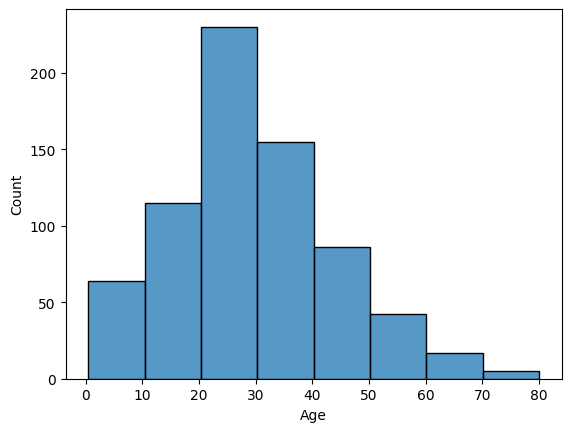

In [46]:
sns.histplot(df['Age'],bins = 8)

<Axes: ylabel='Age'>

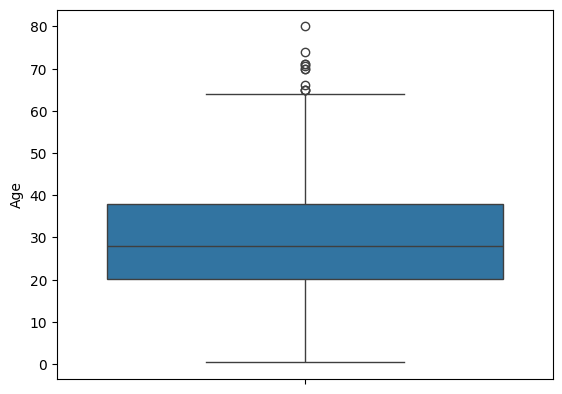

In [47]:
sns.boxplot(df['Age'])

In [48]:
df['Fare'].mean()

np.float64(32.204207968574636)

# **Bivariate Analysis**

<Axes: xlabel='Pclass', ylabel='Age'>

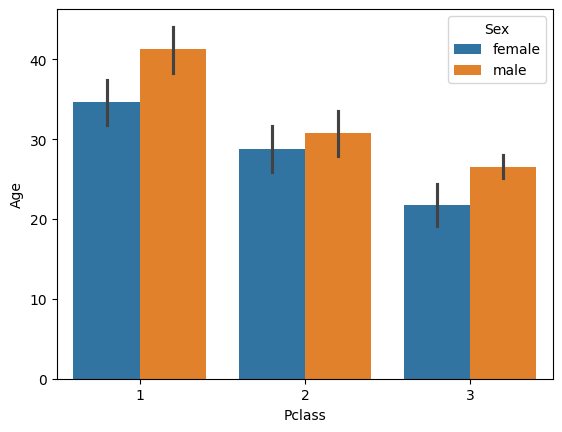

In [51]:
sns.barplot(x='Pclass', y='Age', hue='Sex', data=df)

<Axes: xlabel='Sex', ylabel='Age'>

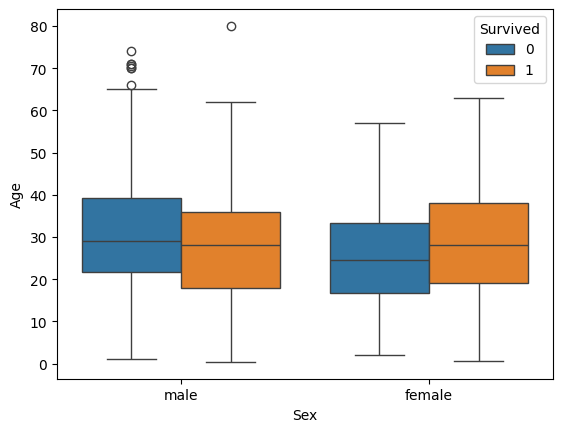

In [56]:
sns.boxplot(x='Sex', y='Age', hue='Survived', data=df)

<Axes: xlabel='Age', ylabel='Density'>

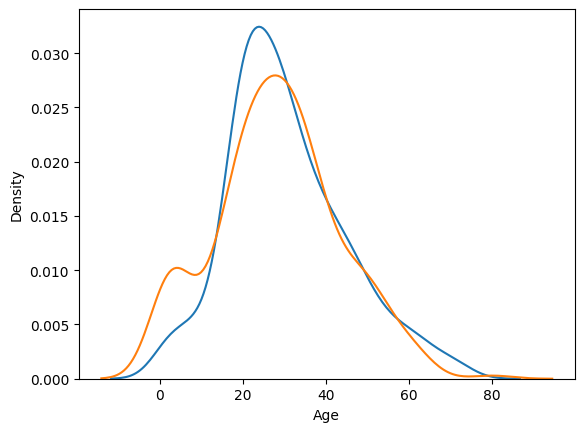

In [63]:
sns.kdeplot(df[df['Survived'] == 0]['Age'])
sns.kdeplot(df[df['Survived'] == 1]['Age'])

<Axes: xlabel='Survived', ylabel='Pclass'>

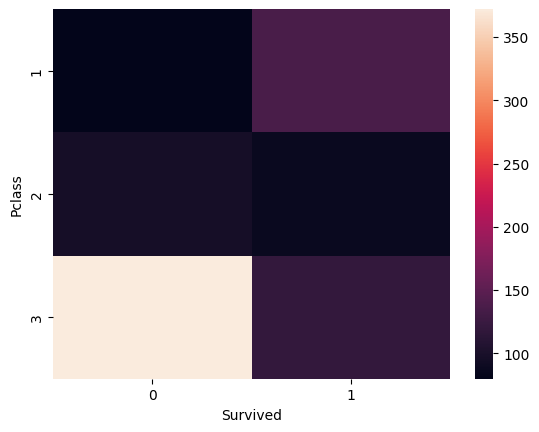

In [65]:
sns.heatmap(pd.crosstab(df['Pclass'],df['Survived']))

In [67]:
df.groupby('Embarked')['Survived'].mean()*100

,Survived
Embarked,
C,55.357143
Q,38.961039
S,33.695652


In [75]:
df.groupby('isAlloted')['Survived'].mean()*100

,Survived
isAlloted,
0,29.985444
1,66.666667


In [76]:
df.groupby(['isAlloted','Pclass'])['isAlloted'].value_counts()

isAlloted  Pclass
0          1          40
           2         168
           3         479
1          1         176
           2          16
           3          12
Name: count, dtype: int64

In [83]:
df.groupby('Sex')['Fare'].mean()

,Fare
Sex,
female,44.479818
male,25.523893


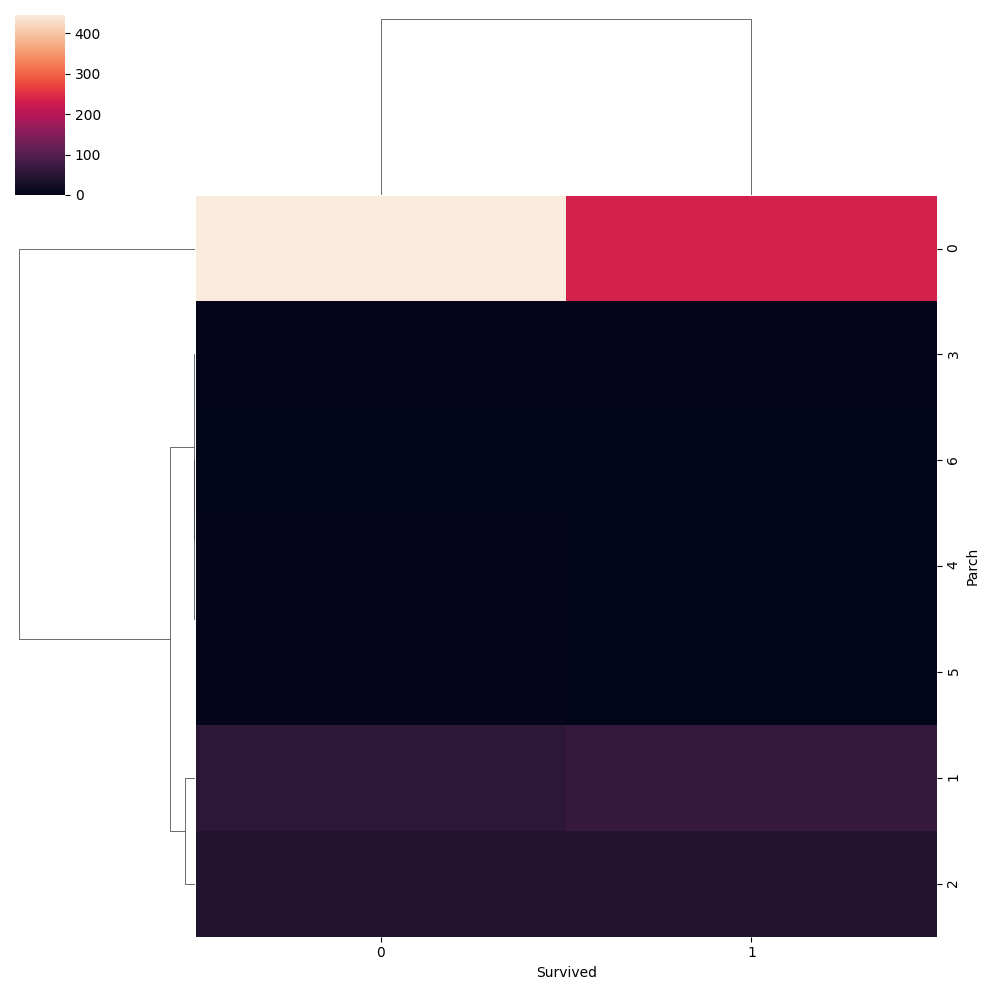

In [84]:
sns.clustermap(pd.crosstab(df['Parch'],df['Survived']))

<Axes: xlabel='Age', ylabel='Fare'>

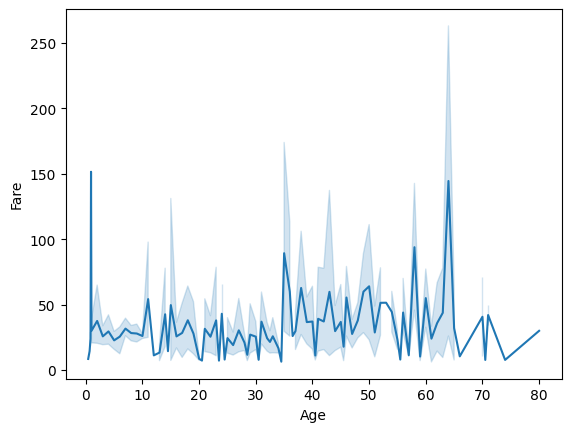

In [87]:
sns.lineplot(x = 'Age',y = 'Fare',data = df)
